In [1]:
#!pip install tensorflow-gpu==2.8.0-rc0
#!pip install mlxtend==0.17.0

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,Conv2D, MaxPool2D, Dropout

In [3]:
print(tf.__version__)

2.8.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Load Dataset

In [5]:
from tensorflow.keras.datasets import cifar10

In [6]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [7]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
X_train.max()

255

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
X_test.shape

(10000, 32, 32, 3)

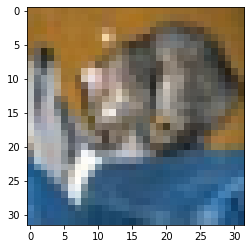

In [12]:
plt.imshow(X_test[0])

In [13]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [14]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=[32,32,3]))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [17]:
history=model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 93s 18ms/step - loss: 1.4634 - sparse_categorical_accuracy: 0.4775 - val_loss: 1.2204 - val_sparse_categorical_accuracy: 0.5731
Epoch 2/10
5000/5000 [==============================] - 88s 18ms/step - loss: 1.2143 - sparse_categorical_accuracy: 0.5695 - val_loss: 1.1150 - val_sparse_categorical_accuracy: 0.6059
Epoch 3/10
5000/5000 [==============================] - 90s 18ms/step - loss: 1.1024 - sparse_categorical_accuracy: 0.6099 - val_loss: 1.0851 - val_sparse_categorical_accuracy: 0.6172
Epoch 4/10
5000/5000 [==============================] - 89s 18ms/step - loss: 1.0291 - sparse_categorical_accuracy: 0.6351 - val_loss: 1.0675 - val_sparse_categorical_accuracy: 0.6233
Epoch 5/10
5000/5000 [==============================] - 86s 17ms/step - loss: 0.9798 - sparse_categorical_accuracy: 0.6524 - val_loss: 1.0427 - val_sparse_categorical_accuracy: 0.6352
Epoch 6/10
5000/5000 [==============================] - 84s 17ms/step - loss: 0.

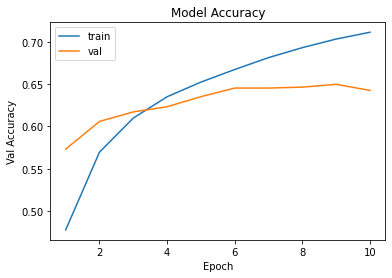

In [18]:
epoch_range=range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Val Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

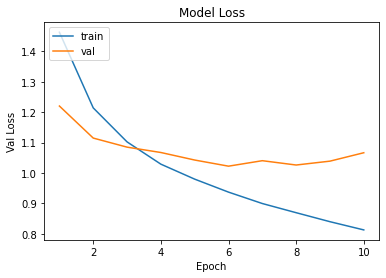

In [19]:
epoch_range=range(1, 11)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Val Loss')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [20]:
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

In [21]:
y_pred

array([8, 8, 8, ..., 5, 1, 7])

In [22]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [23]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [24]:
mat=confusion_matrix(y_test, y_pred)

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb2eaa22610>)

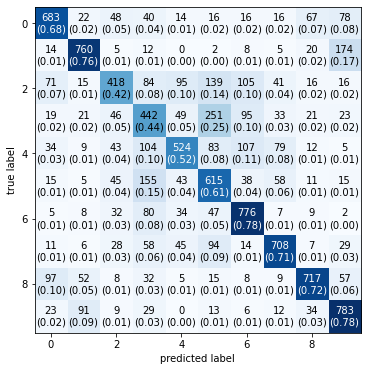

In [25]:
plot_confusion_matrix(mat, figsize=(6,6), show_normed=True)